Loading data from the URL...
Data loaded successfully.
Original dataset head:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Prol

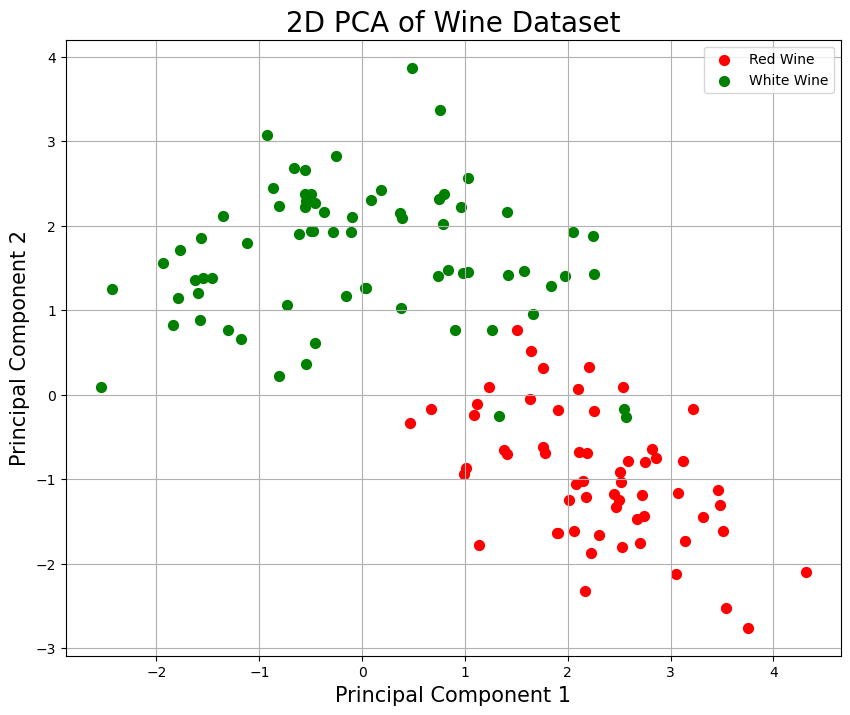

Plot generated successfully. You should see a new window with the visualization.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dataset link
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"

# Load the dataset
print("Loading data from the URL...")
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

print("Data loaded successfully.")
print("Original dataset head:")
print(df.head())
print("-" * 30)

# The last column is the target variable (wine type label)
# All other columns are features (measurements)
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# It's crucial to standardize the features before applying PCA.
# This ensures that variables with larger scales do not dominate the principal components.
print("Standardizing the data...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("Data standardized.")
print("-" * 30)

# Apply PCA with 2 components to reduce dimensionality
# We choose 2 components so we can easily visualize the results on a 2D plot.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
print(f"Explained variance by the first two principal components: {pca.explained_variance_ratio_}")
print("-" * 30)

# Create a new DataFrame for the principal components and the original labels
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['label'] = labels

# Visualize the data using a scatter plot
# We'll use different colors for each wine type to see if the PCA helped with separation.
print("Generating scatter plot...")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA of Wine Dataset', fontsize=20)

# Unique labels in the dataset
unique_labels = pca_df['label'].unique()
colors = ['r', 'g']
label_names = ['Red Wine', 'White Wine']

# Plot the data points
for label, color, name in zip(unique_labels, colors, label_names):
    indices_to_keep = pca_df['label'] == label
    ax.scatter(pca_df.loc[indices_to_keep, 'Principal Component 1'],
               pca_df.loc[indices_to_keep, 'Principal Component 2'],
               c=color,
               s=50,
               label=name)

ax.legend()
ax.grid(True)

# Display the plot
plt.show()

print("Plot generated successfully. You should see a new window with the visualization.")